In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('flights.csv')

In [5]:
df.shape

(336776, 21)

In [6]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,336776.0,168387.500000,97219.001466,0.0,84193.75,168387.5,252581.25,336775.0
year,336776.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
month,336776.0,6.548510,3.414457,1.0,4.00,7.0,10.00,12.0
day,336776.0,15.710787,8.768607,1.0,8.00,16.0,23.00,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.00,1401.0,1744.00,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.00,1359.0,1729.00,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.00,-2.0,11.00,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.00,1535.0,1940.00,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.00,1556.0,1945.00,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.00,-5.0,14.00,1272.0


## Domestic AIRLINES Market Leaders

name
United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: count, dtype: int64

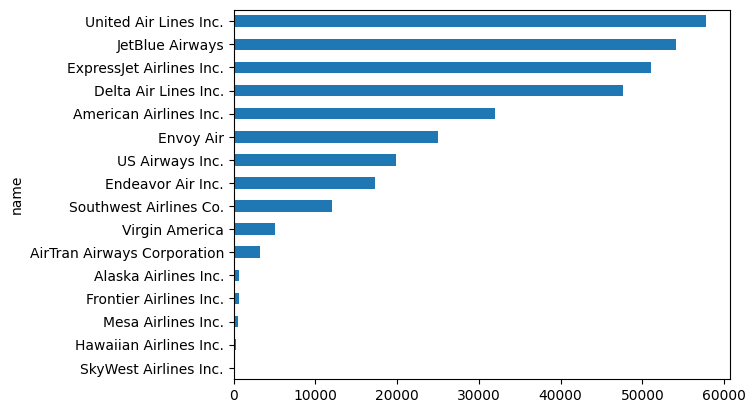

In [28]:
df.value_counts().groupby('name').count().sort_values(ascending=True).plot(kind='barh')
df.value_counts().groupby('name').count().sort_values(ascending=False)

## Number of Flights, distributed over 12 months of year 2013

In [38]:
pivot_month_name = pd.pivot_table(df, values='id', index='name', columns='month', aggfunc='count', fill_value=0)
pivot_month_name['Total'] = pivot_month_name.sum(axis=1)
total_row = pivot_month_name.sum(axis=0)
total_row.name = 'Total by Month'
pivot_month_name = pd.concat([pivot_month_name, total_row.to_frame().T])
print(pivot_month_name)

month                            1      2      3      4      5      6      7  \
AirTran Airways Corporation    328    296    316    311    325    252    263   
Alaska Airlines Inc.            62     56     62     60     62     60     62   
American Airlines Inc.        2794   2517   2787   2722   2803   2757   2882   
Delta Air Lines Inc.          3690   3444   4189   4092   4082   4126   4251   
Endeavor Air Inc.             1573   1459   1627   1511   1462   1437   1494   
Envoy Air                     2271   2044   2256   2211   2284   2178   2261   
ExpressJet Airlines Inc.      4171   3827   4726   4561   4817   4456   4641   
Frontier Airlines Inc.          59     49     57     57     58     55     58   
Hawaiian Airlines Inc.          31     28     31     30     31     30     31   
JetBlue Airways               4427   4103   4772   4517   4576   4622   4984   
Mesa Airlines Inc.              46     48     18     38     49     49     81   
SkyWest Airlines Inc.            1      

<Axes: xlabel='month'>

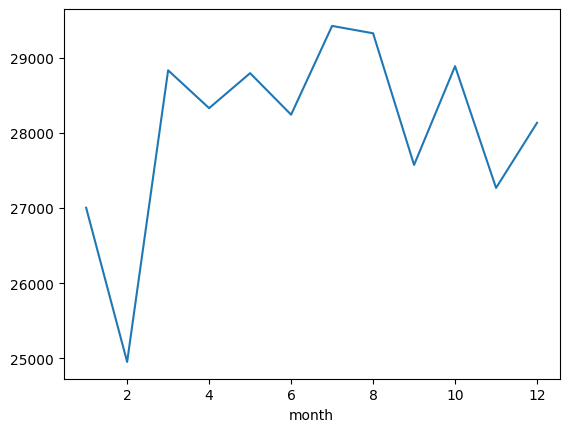

In [48]:
df[['id','month']].value_counts().groupby('month').sum().plot(kind='line')

## Total air_time, distance travelled by each Airline, for the year 2013

In [156]:
result = df.groupby('name')[['air_time', 'distance']].sum().sort_values(by=['distance'], ascending=False).reset_index()
print(result)

                           name    air_time  distance
0         United Air Lines Inc.  12237728.0  89705524
1          Delta Air Lines Inc.   8277661.0  59507317
2               JetBlue Airways   8170975.0  58384137
3        American Airlines Inc.   6032306.0  43864584
4      ExpressJet Airlines Inc.   4603614.0  30498951
5                     Envoy Air   2282880.0  15033955
6                Virgin America   1724104.0  12902327
7        Southwest Airlines Co.   1780402.0  12229203
8               US Airways Inc.   1756507.0  11365778
9             Endeavor Air Inc.   1500801.0   9788152
10  AirTran Airways Corporation    321132.0   2167344
11         Alaska Airlines Inc.    230863.0   1715028
12       Hawaiian Airlines Inc.    213096.0   1704186
13       Frontier Airlines Inc.    156357.0   1109700
14           Mesa Airlines Inc.     35763.0    225395
15        SkyWest Airlines Inc.      2421.0     16026


#### Average Fuel Consumption of a domestic flight = 3000 litres / 100km

In [157]:
result['Jet A-1 Fuel Consumed (in 10^6 Litres)'] = ((result['distance']/100)*3000)/1000000

#### CO2 Emission = Fuel Mass * Fuel Density(=0.8) * Carbon_Emission_Factor(=3.15 kg for Jet A-1 Fuel)

In [158]:
result['CO2 Emission (in 10^6 KG)'] = result['Jet A-1 Fuel Consumed (in 10^6 Litres)']*0.8*3.15

## Total CO2 emission, for each airline

In [162]:
total_row = result.sum(axis=0)
result = pd.concat([result, total_row.to_frame().T])

In [163]:
print(result)

                                                 name    air_time   distance  \
0                               United Air Lines Inc.  12237728.0   89705524   
1                                Delta Air Lines Inc.   8277661.0   59507317   
2                                     JetBlue Airways   8170975.0   58384137   
3                              American Airlines Inc.   6032306.0   43864584   
4                            ExpressJet Airlines Inc.   4603614.0   30498951   
5                                           Envoy Air   2282880.0   15033955   
6                                      Virgin America   1724104.0   12902327   
7                              Southwest Airlines Co.   1780402.0   12229203   
8                                     US Airways Inc.   1756507.0   11365778   
9                                   Endeavor Air Inc.   1500801.0    9788152   
10                        AirTran Airways Corporation    321132.0    2167344   
11                               Alaska 

## Total CO2 Emission ~ 2,647,645,108 kgs (Only for a small fraction of flights on our planet)
## Save EARTH <3

## For the MAP,

### For the below .csv file, I scraped a site for IATA Codes. Idk about legality, but for this project, it's a very small amount of data. PS: Sorry Gcmap :(

In [102]:
airport_data = pd.read_csv('Airport_Latitude_Longitude.csv')

In [122]:
airport_data.head()

,dest_iata,Latitude,Longitude
0,IAH,29.984435,-95.341442
1,MIA,25.795361,-80.290115
2,BQN,18.494861,-67.129443
3,ATL,33.636700,-84.427863
4,ORD,41.976940,-87.908149


In [121]:
airport_data.rename(columns={'dest_data':'dest_iata'}, inplace=True)

In [105]:
flights = df[['id', 'name', 'origin', 'dest']]

In [106]:
flights['origin_iata'] = flights['origin']
flights['dest_iata'] = flights['dest']

C:\Users\adity\AppData\Local\Temp\ipykernel_18224\597810733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['origin_iata'] = flights['origin']
C:\Users\adity\AppData\Local\Temp\ipykernel_18224\597810733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['dest_iata'] = flights['dest']


In [123]:
flights = flights.merge(airport_data, on='dest_iata', how='left')

In [125]:
flights.rename(columns={"Latitude":"Destination_Latitude", "Longitude":"Destination_Longitude"}, inplace=True)

In [126]:
flights.head()

,id,name,origin,dest,origin_iata,dest_iata,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude
0,0,United Air Lines Inc.,EWR,IAH,EWR,IAH,40.692480,-74.168686,29.984435,-95.341442
1,1,United Air Lines Inc.,LGA,IAH,LGA,IAH,40.777242,-73.872605,29.984435,-95.341442
2,2,American Airlines Inc.,JFK,MIA,JFK,MIA,40.639928,-73.778691,25.795361,-80.290115
3,3,JetBlue Airways,JFK,BQN,JFK,BQN,40.639928,-73.778691,18.494861,-67.129443
4,4,Delta Air Lines Inc.,LGA,ATL,LGA,ATL,40.777242,-73.872605,33.636700,-84.427863


In [127]:
flights.shape

(336776, 10)

In [130]:
import folium

### We shall sample 2000 random flights, to save on rendering time

In [133]:
data = flights
data = data.sample(n=2000, random_state=1)
mean_lat = data['Origin_Latitude'].mean()
mean_lon = data['Origin_Longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=2)

# Function to add lines between points
def add_lines(row):
    folium.PolyLine(
        locations=[(row['Origin_Latitude'], row['Origin_Longitude']),
                   (row['Destination_Latitude'], row['Destination_Longitude'])],
        color='blue', weight=1.5, opacity=0.5
    ).add_to(m)

# Apply the function to each row (considering performance)
for _, row in data.iterrows():
    add_lines(row)

# Save the map to an HTML file
m.save('flight_routes_map.html')
